In [30]:
import pandas as pd
import numpy as np
from plotnine import *
from pandas.api.types import CategoricalDtype

In [31]:
death_by_borough ='death_data/xlsx/death_per_borough.csv'

In [32]:
db = pd.read_csv(death_by_borough)

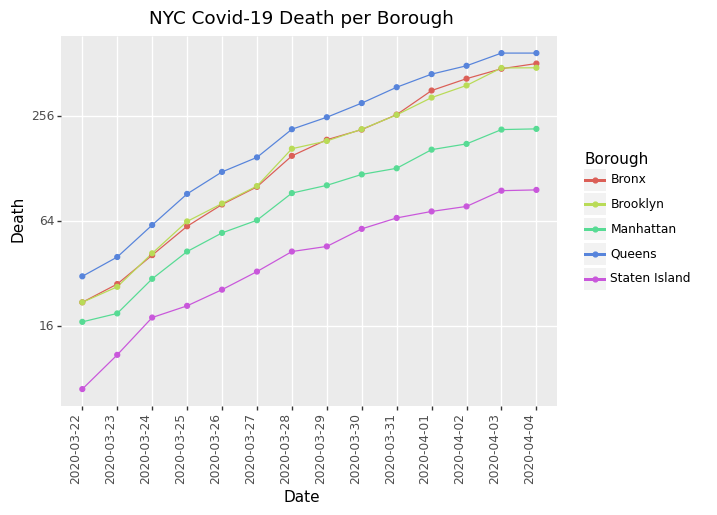

<ggplot: (-9223372029316123476)>

In [33]:
p=(ggplot(db)         # defining what data to use
 + aes(x='Date',y='Death',group='Borough')    # defining what variable to use
 + geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_point(aes(color='Borough'))
 + scale_y_continuous(trans='log2')
 + labs(title='NYC Covid-19 Death per Borough', x='Date', y='Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)
p

In [ ]:
ggsave(p, filename = 'death_by_borough.png')

In [ ]:
t = db.groupby(['Date'])['Death'].sum()


In [ ]:
total = db.groupby(['Date'])['Death'].sum().reset_index()

In [ ]:
mergedDf = db.merge(total, left_on='Date', right_on='Date')

In [ ]:
mergedDf['pc']=mergedDf['Death_x']/mergedDf['Death_y']

In [ ]:
q=(ggplot(mergedDf)         # defining what data to use
 + aes(x='Date',y='pc',group='Borough')    # defining what variable to use
 + geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_point(aes(color='Borough'))
 + labs(title='NYC Covid-19 percentage of Death per Borough', x='Date', y='% Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)
q

In [ ]:
ggsave(q, filename = 'percentage_of_death_by_borough.png')

In [20]:
for ind in db.index: 
     print(ind, db['Date'][ind], db['Borough'][ind], db['Death'][ind]) 

0 2020-03-22 Bronx 22.0
1 2020-03-22 Brooklyn 22.0
2 2020-03-22 Manhattan 17.0
3 2020-03-22 Queens 31.0
4 2020-03-22 Staten Island 7.0
5 2020-03-23 Bronx 28.0
6 2020-03-23 Brooklyn 27.0
7 2020-03-23 Manhattan 19.0
8 2020-03-23 Queens 40.0
9 2020-03-23 Staten Island 11.0
10 2020-03-24 Bronx 41.0
11 2020-03-24 Brooklyn 42.0
12 2020-03-24 Manhattan 30.0
13 2020-03-24 Queens 61.0
14 2020-03-24 Staten Island 18.0
15 2020-03-25 Bronx 60.0
16 2020-03-25 Brooklyn 64.0
17 2020-03-25 Manhattan 43.0
18 2020-03-25 Queens 92.0
19 2020-03-25 Staten Island 21.0
20 2020-03-26 Bronx 80.0
21 2020-03-26 Brooklyn 81.0
22 2020-03-26 Manhattan 55.0
23 2020-03-26 Queens 123.0
24 2020-03-26 Staten Island 26.0
25 2020-03-27 Bronx 101.0
26 2020-03-27 Brooklyn 102.0
27 2020-03-27 Manhattan 65.0
28 2020-03-27 Queens 149.0
29 2020-03-27 Staten Island 33.0
30 2020-03-28 Bronx 152.0
31 2020-03-28 Brooklyn 167.0
32 2020-03-28 Manhattan 93.0
33 2020-03-28 Queens 216.0
34 2020-03-28 Staten Island 43.0
35 2020-03-29 Bro

In [21]:
dict(zip(db.Borough,db.Death))



{'Bronx': 514.0,
 'Brooklyn': 486.0,
 'Manhattan': 217.0,
 'Queens': 590.0,
 'Staten Island': 97.0}

In [24]:
total

,Date,Death,Borough
0,2020-03-22,99.0,Total
1,2020-03-23,125.0,Total
2,2020-03-24,192.0,Total
3,2020-03-25,280.0,Total
4,2020-03-26,365.0,Total
5,2020-03-27,450.0,Total
6,2020-03-28,671.0,Total
7,2020-03-29,775.0,Total
8,2020-03-30,913.0,Total
9,2020-03-31,1095.0,Total


In [23]:
total['Borough']='Total'

In [25]:
db

,Date,Borough,Death
0,2020-03-22,Bronx,22.0
1,2020-03-22,Brooklyn,22.0
2,2020-03-22,Manhattan,17.0
3,2020-03-22,Queens,31.0
4,2020-03-22,Staten Island,7.0
...,...,...,...
65,2020-04-04,Bronx,514.0
66,2020-04-04,Brooklyn,486.0
67,2020-04-04,Manhattan,217.0
68,2020-04-04,Queens,590.0


In [26]:
df = pd.concat([db, total], axis=0)

In [27]:
df

,Date,Borough,Death
0,2020-03-22,Bronx,22.0
1,2020-03-22,Brooklyn,22.0
2,2020-03-22,Manhattan,17.0
3,2020-03-22,Queens,31.0
4,2020-03-22,Staten Island,7.0
...,...,...,...
9,2020-03-31,Total,1095.0
10,2020-04-01,Total,1373.0
11,2020-04-02,Total,1561.0
12,2020-04-03,Total,1866.0


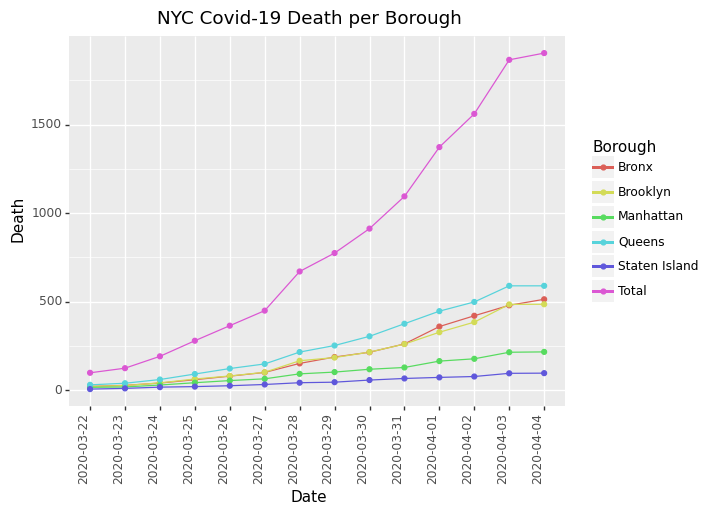

<ggplot: (-9223372029316573552)>

In [28]:
(ggplot(df)         # defining what data to use
 + aes(x='Date',y='Death',group='Borough')    # defining what variable to use
 + geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_point(aes(color='Borough'))
 + labs(title='NYC Covid-19 Death per Borough', x='Date', y='Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)

In [29]:
df.to_csv('death_data/per_borough.csv',index=False)